## Import Libraries

In [1]:
# importing libraries

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Dataset_BUSI_with_GT/Features.csv')

In [3]:
data.head()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,...,Histeq_std,dl_mean,dl_std_dev,Entropy,Energy,Correlation,Dissimilarity,Homogenity,Contrast,label
0,78.500854,46.769680,50.380066,58.775748,113.273254,60.830760,579.773146,29.973022,43.803528,23.073971,...,73.401876,113.841125,62.137629,156.786479,0.017177,0.964083,8.811454,0.131086,156.786479,normal
1,50.696167,50.380796,31.761902,52.855543,89.535400,60.694865,540.303759,6.729187,23.876221,31.567407,...,73.076011,74.864868,62.560576,135.834154,0.032523,0.973272,8.099286,0.156050,135.834154,normal
2,103.656738,51.219374,85.202637,65.242512,123.229858,64.011365,750.489685,-24.112610,61.083130,37.510963,...,73.607790,142.900391,56.678783,238.783526,0.014268,0.954311,10.636626,0.105213,238.783526,normal
3,62.507629,36.060182,20.259460,40.648578,108.470825,61.673364,614.394093,-27.587036,31.947510,17.353388,...,73.377197,97.913635,50.605540,168.789001,0.020592,0.935090,8.634104,0.139739,168.789001,normal
4,127.308716,47.649705,114.935547,61.220481,126.263550,64.205135,681.411752,25.564270,83.759521,36.407759,...,73.656231,165.376404,50.941977,194.504675,0.014478,0.957096,10.245448,0.105215,194.504675,normal


In [4]:
# check the features,Non-null count and Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gray_mean         780 non-null    float64
 1   gray_std_dev      780 non-null    float64
 2   adaptive_mean     780 non-null    float64
 3   adaptive_std_dev  780 non-null    float64
 4   clahe_mean        780 non-null    float64
 5   clahe_std_dev     780 non-null    float64
 6   sobel_std_dev     780 non-null    float64
 7   sobel_mean        780 non-null    float64
 8   er_mean           780 non-null    float64
 9   er_std_dev        780 non-null    float64
 10  Histeq_mean       780 non-null    float64
 11  Histeq_std        780 non-null    float64
 12  dl_mean           780 non-null    float64
 13  dl_std_dev        780 non-null    float64
 14  Entropy           780 non-null    float64
 15  Energy            780 non-null    float64
 16  Correlation       780 non-null    float64
 1

In [5]:
## finding the features mean, std,min and max
data.describe()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,Entropy,Energy,Correlation,Dissimilarity,Homogenity,Contrast
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,84.765208,52.890879,61.958817,63.248739,111.811934,62.616495,664.892254,4.806492,49.398302,35.212729,128.481883,72.950791,118.344103,62.869195,183.129016,0.033085,0.964124,8.856170,0.149656,183.129016
std,19.659784,8.368976,23.962888,9.771741,10.737505,3.379879,111.532125,27.939163,16.180870,8.983311,1.910380,2.234217,22.994065,9.364539,62.708554,0.046143,0.018331,1.413543,0.051248,62.708554
min,35.513428,32.290799,4.414124,20.681966,66.819397,52.943908,331.502165,-114.169495,8.727844,12.583008,118.381104,46.962254,58.447327,36.683310,33.485236,0.012952,0.888331,3.954847,0.087859,33.485236
25%,71.741364,46.796348,44.675156,58.261350,106.982971,60.430474,590.052428,-12.952148,37.557587,28.921831,128.099838,73.204000,103.572647,56.202733,143.444574,0.015728,0.954543,7.980623,0.120910,143.444574
50%,84.265167,52.750538,60.951324,63.631873,113.548950,62.430465,654.897669,3.623993,48.327972,35.161616,128.259338,73.414133,118.282959,63.362553,173.986928,0.018209,0.968599,8.802873,0.135639,173.986928
75%,98.525787,59.149852,79.932632,70.082571,119.365295,64.648371,733.164237,22.729813,60.641541,41.419275,128.432602,73.555955,134.320602,69.615725,212.858775,0.025962,0.977564,9.765102,0.159160,212.858775
max,169.523865,75.082079,168.797119,87.597034,130.374084,73.200720,1040.223483,96.741272,120.181274,60.875059,153.461975,78.364629,212.369446,85.731138,426.922367,0.440867,0.994941,13.706201,0.505440,426.922367


            Target Variable Distribution           


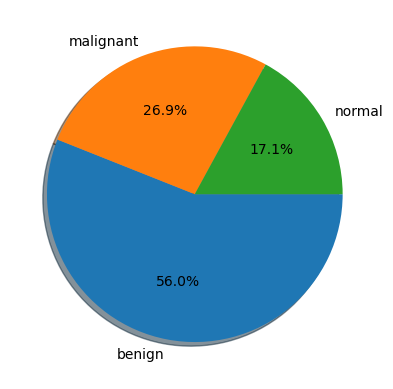

In [6]:
#Let us first analyze the distribution of the target variable
target = 'label'
labels = ['benign', 'malignant', 'no tumor']
features = [i for i in data.columns.values if i not in [target]]

explode=np.zeros(len(labels))
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(data[target].value_counts(),
        labels=data[target].value_counts().index,
        counterclock=False,
        shadow=True,
        autopct='%1.1f%%',
        radius=1,
        startangle=0)
plt.show()

In [7]:
# sns.pairplot(data, hue='label')
# plt.show()

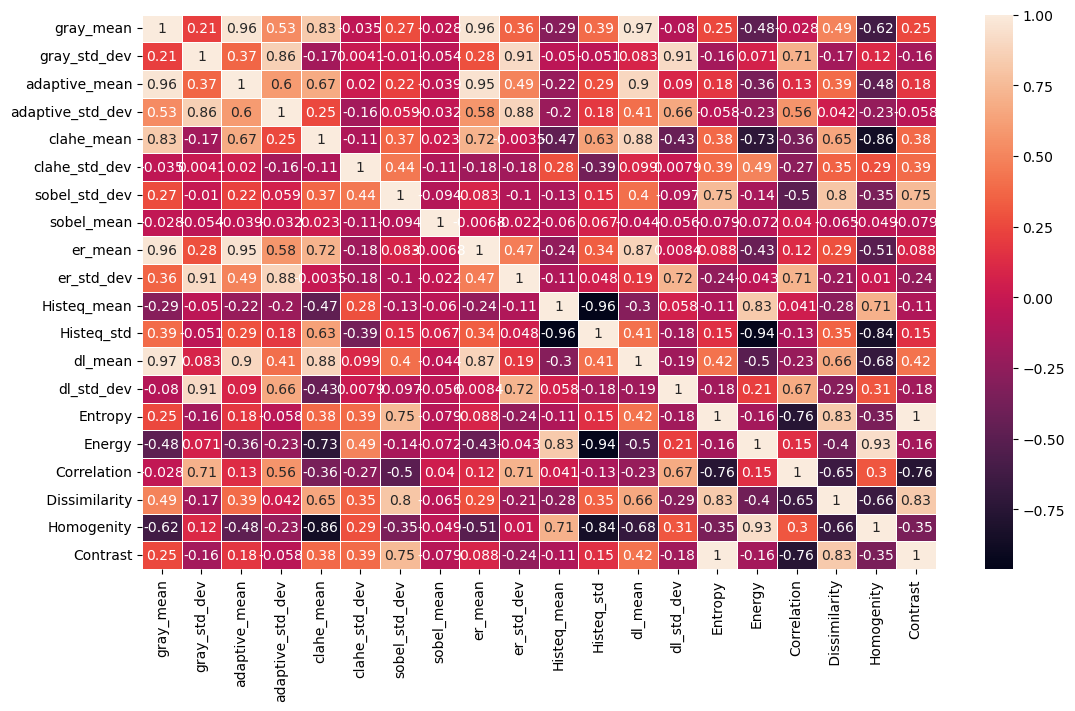

In [8]:
corr = data[data.columns].corr()

w, h, dpi = 1280, 720, 100
fig, ax = plt.subplots(figsize=(w/dpi, h/dpi), dpi=dpi)
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

               Features Distribution               


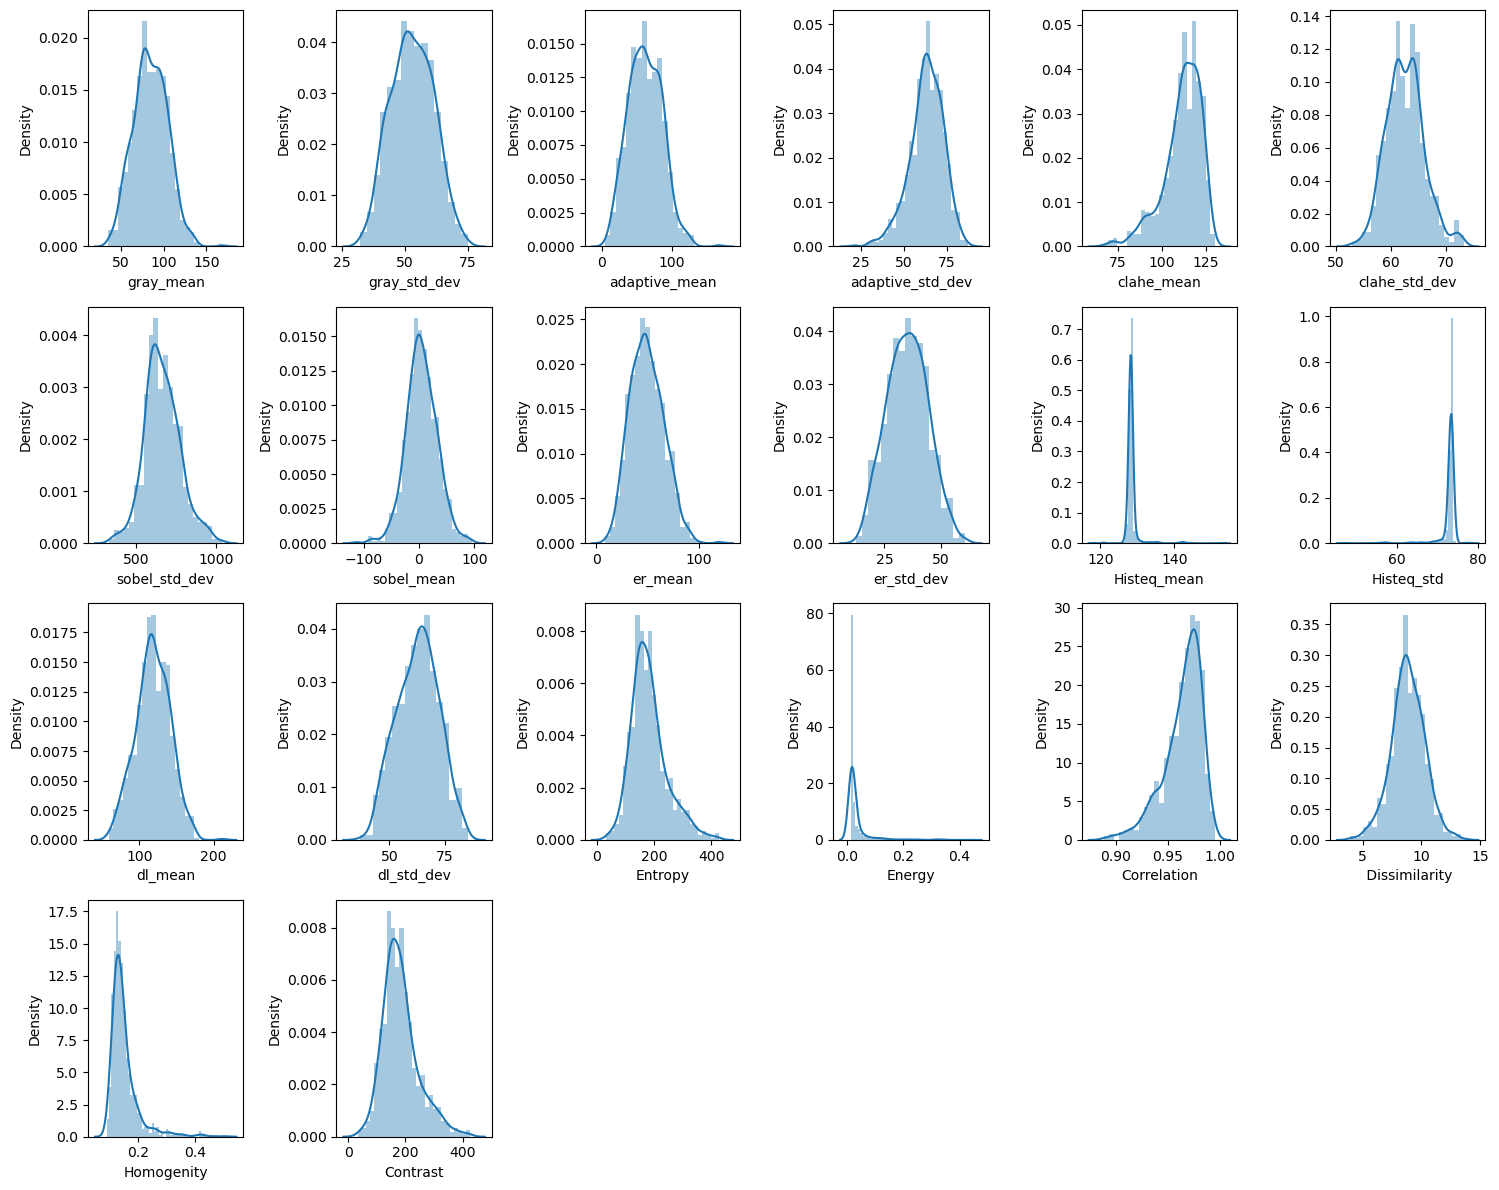

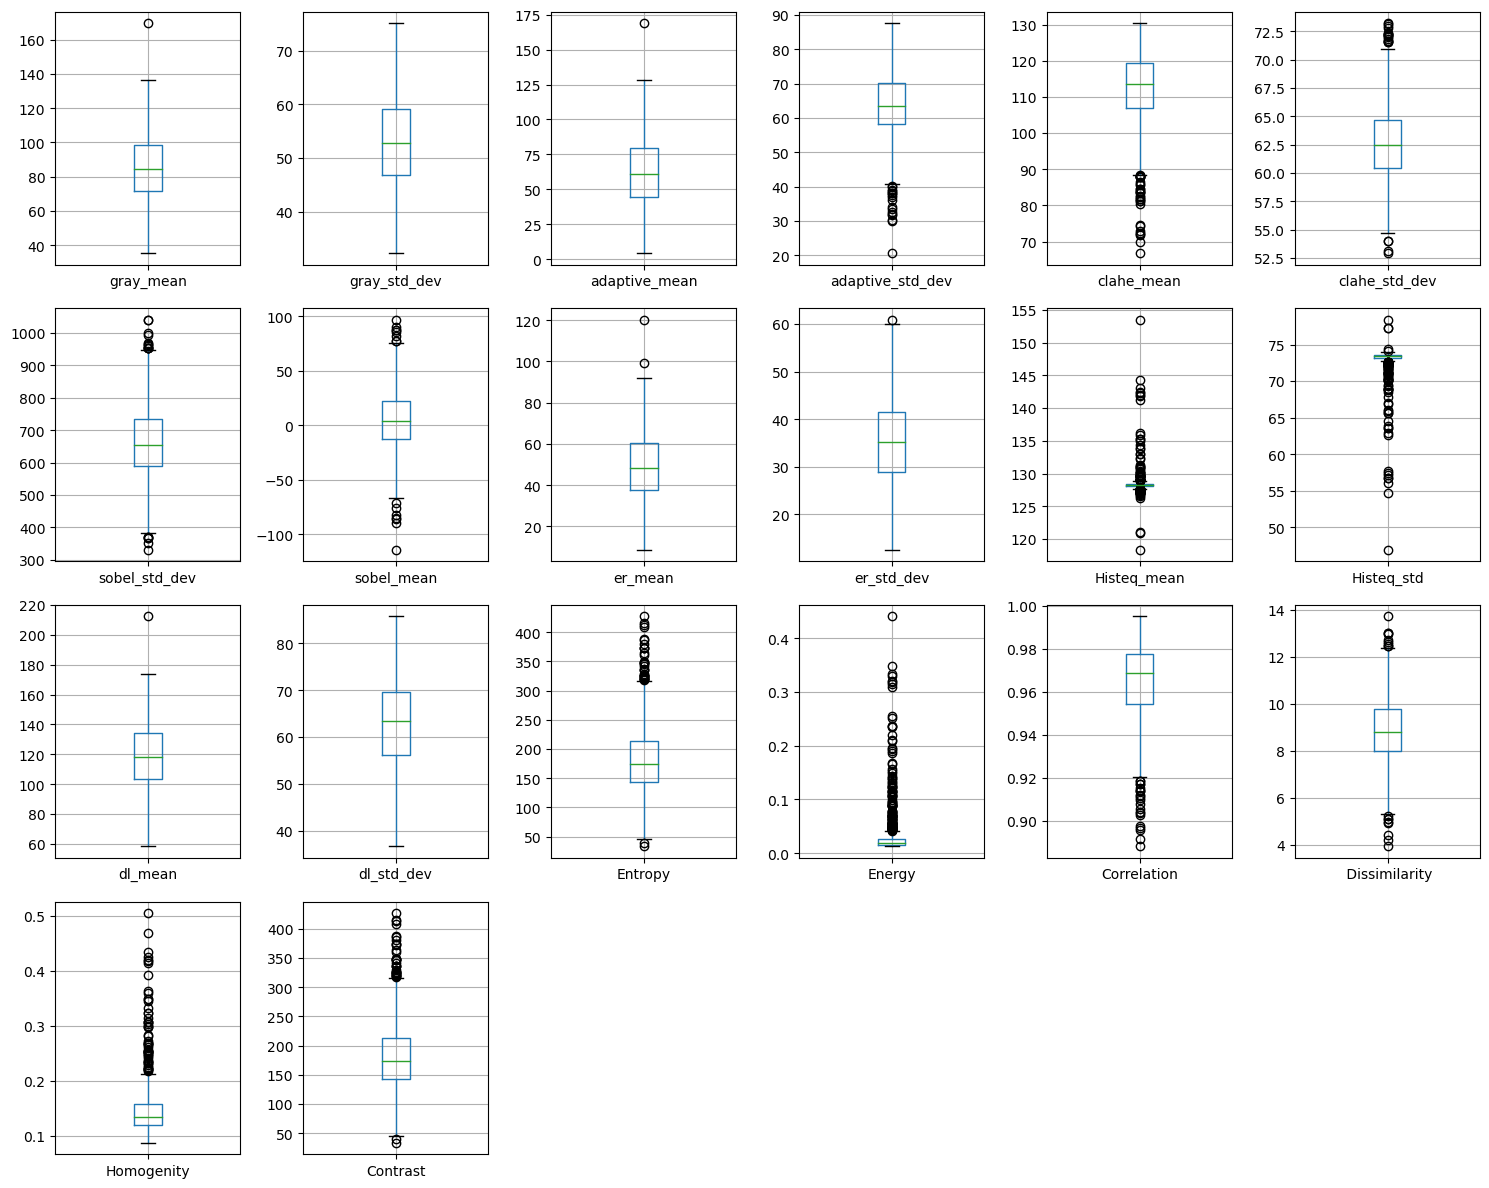

In [9]:
print('\033[1mFeatures Distribution'.center(55))
cf = []
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []
nnf = 0 # numerical features
ncf = 0 # categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [10]:
#Check for empty elements
nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
gray_mean                         0         0.0
Homogenity                        0         0.0
 Dissimilarity                    0         0.0
Correlation                       0         0.0
Energy                            0         0.0
Entropy                           0         0.0
dl_std_dev                        0         0.0
dl_mean                           0         0.0
Histeq_std                        0         0.0
Contrast                          0         0.0
Histeq_mean                       0         0.0
er_mean                           0         0.0
sobel_mean                        0         0.0
sobel_std_dev                     0         0.0
clahe_std_dev                     0         0.0
clahe_mean                        0         0.0
adaptive_std_dev                  0         0.0
adaptive_mean                     0         0.0
gray_std_dev                      0         0.0
er_std_dev                        0     

In [11]:
X = data.drop([target],axis=1)
Y = data[target]

std = StandardScaler()
print('\033[1mStandardardization on Dataset'.center(55))
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
display(X_std.describe())

x_train, x_test, y_train, y_test = train_test_split(X_std, Y, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ', X_std.shape, Y.shape)
print('Training set  ---> ', x_train.shape, y_train.shape)
print('Testing set   ---> ', x_test.shape, y_test.shape)

           Standardardization on Dataset           


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,Entropy,Energy,Correlation,Dissimilarity,Homogenity,Contrast
count,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02
mean,-2.368476e-16,-5.010237e-16,-1.138690e-16,-9.473903e-16,-2.550666e-16,1.475743e-15,-1.275333e-16,-1.594166e-17,-9.564998e-17,-2.550666e-16,-2.523338e-15,-3.141646e-15,-3.097238e-16,-6.194475e-16,9.109522e-17,-1.115916e-16,-9.952153e-15,-4.828047e-16,5.921189e-17,9.109522e-17
std,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00
min,-2.506812e+00,-2.463061e+00,-2.402950e+00,-4.358904e+00,-4.192911e+00,-2.863650e+00,-2.991102e+00,-4.261127e+00,-2.515103e+00,-2.520701e+00,-5.290708e+00,-1.163952e+01,-2.606551e+00,-2.798076e+00,-2.387869e+00,-4.366140e-01,-4.137340e+00,-3.469628e+00,-1.206617e+00,-2.387869e+00
25%,-6.628863e-01,-7.286963e-01,-7.217307e-01,-5.107165e-01,-4.500171e-01,-6.471898e-01,-6.714464e-01,-6.360260e-01,-7.322420e-01,-7.007366e-01,-2.001120e-01,1.134054e-01,-6.428152e-01,-7.123405e-01,-6.332454e-01,-3.764058e-01,-5.230156e-01,-6.197967e-01,-5.612781e-01,-6.332454e-01
50%,-2.545103e-02,-1.677993e-02,-4.207085e-02,3.923342e-02,1.618748e-01,-5.507551e-02,-8.966921e-02,-4.235123e-02,-6.619027e-02,-5.693441e-03,-1.165671e-01,2.075177e-01,-2.660827e-03,5.271739e-02,-1.458805e-01,-3.226084e-01,2.442954e-01,-3.772870e-02,-2.737025e-01,-1.458805e-01
75%,7.003845e-01,7.483579e-01,7.505501e-01,6.997950e-01,7.039073e-01,6.015541e-01,6.125212e-01,6.419241e-01,6.952934e-01,6.913407e-01,-2.581302e-02,2.710356e-01,6.952555e-01,7.208960e-01,4.743984e-01,-1.544794e-01,7.336613e-01,6.434300e-01,1.855595e-01,4.743984e-01
max,4.314037e+00,2.653304e+00,4.461351e+00,2.493303e+00,1.729830e+00,3.133549e+00,3.367389e+00,3.292646e+00,4.377292e+00,2.858500e+00,1.308437e+01,2.424703e+00,4.091737e+00,2.442898e+00,3.890215e+00,8.842979e+00,1.682218e+00,3.433319e+00,6.946823e+00,3.890215e+00


Original set  --->  (780, 20) (780,)
Training set  --->  (624, 20) (624,)
Testing set   --->  (156, 20) (156,)


In [12]:
## Applying Logistic Regression Algorithm
def logistic_regression(x_train, y_train, labels, normalize='true'):
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print('Test Accuracy Score of Basic Logistics Regression:',test_accuracy)
    conf1 = confusion_matrix(y_test, y_pred, normalize=normalize)
    sns.heatmap(conf1, annot=True, xticklabels=labels, yticklabels=labels)
    print(classification_report(y_test,y_pred))

Test Accuracy Score of Basic Logistics Regression: 70.51
              precision    recall  f1-score   support

      benign       0.73      0.84      0.78        88
   malignant       0.70      0.65      0.68        40
      normal       0.59      0.36      0.44        28

    accuracy                           0.71       156
   macro avg       0.67      0.62      0.63       156
weighted avg       0.70      0.71      0.69       156



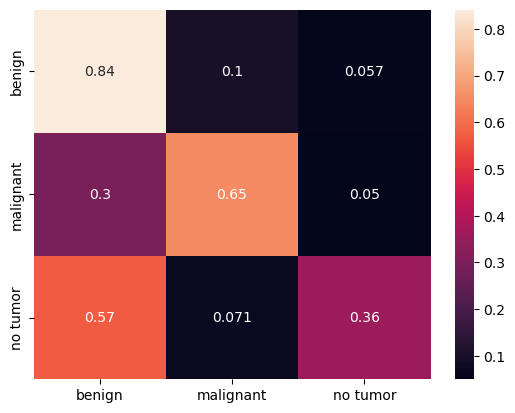

In [13]:
logistic_regression(x_train, y_train, labels, 'true')

# Resampling Dataset

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [14]:
def plot_2d_space(X, y, label='Classes', w=1280, h=620, dpi=70):
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

    colors = ['#1F77B4', '#FF7F0E', '#157F2E']

    fig, ax = plt.subplots(figsize=(w/dpi, h/dpi), dpi=dpi)

    for l, c in zip(np.unique(y), colors):
        plt.scatter(X[y==l, 0],
                    X[y==l, 1],
                    c=c, label=l, marker='o')
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [15]:
# plot_2d_space(X, Y, 'Imbalanced dataset (2 PCA components)')

## Random under-sampling

In [16]:
rus = RandomUnderSampler(random_state=15)
X_rus, Y_rus = rus.fit_resample(X, Y)

print(Y_rus.value_counts())

# plot_2d_space(X_rus, Y_rus, 'Random under-sampling')

benign       133
malignant    133
normal       133
Name: label, dtype: int64


Original set  --->  (399, 20) (399,)
Training set  --->  (319, 20) (319,)
Testing set   --->  (80, 20) (80,) 

Test Accuracy Score of Basic Logistics Regression: 63.75
              precision    recall  f1-score   support

      benign       0.56      0.54      0.55        26
   malignant       0.62      0.72      0.67        25
      normal       0.73      0.66      0.69        29

    accuracy                           0.64        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.64      0.64      0.64        80



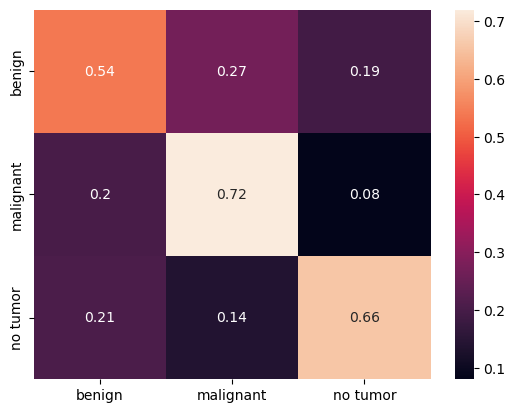

In [17]:
X_std = std.fit_transform(X_rus)

x_train, x_test, y_train, y_test = train_test_split(X_std, Y_rus, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ', X_rus.shape, Y_rus.shape)
print('Training set  ---> ', x_train.shape, y_train.shape)
print('Testing set   ---> ', x_test.shape, y_test.shape, '\n')

logistic_regression(x_train, y_train, labels, 'true')

## Random over-sampling

In [18]:
rus = RandomOverSampler(random_state=15, sampling_strategy='not majority')
X_rus, Y_rus = rus.fit_resample(X, Y)

print(Y_rus.value_counts())

# plot_2d_space(X_rus, Y_rus, 'Random over-sampling')

normal       437
benign       437
malignant    437
Name: label, dtype: int64


Original set  --->  (1311, 20) (1311,)
Training set  --->  (1048, 20) (1048,)
Testing set   --->  (263, 20) (263,) 

Test Accuracy Score of Basic Logistics Regression: 65.78
              precision    recall  f1-score   support

      benign       0.61      0.46      0.53        89
   malignant       0.64      0.80      0.71        85
      normal       0.72      0.72      0.72        89

    accuracy                           0.66       263
   macro avg       0.66      0.66      0.65       263
weighted avg       0.66      0.66      0.65       263



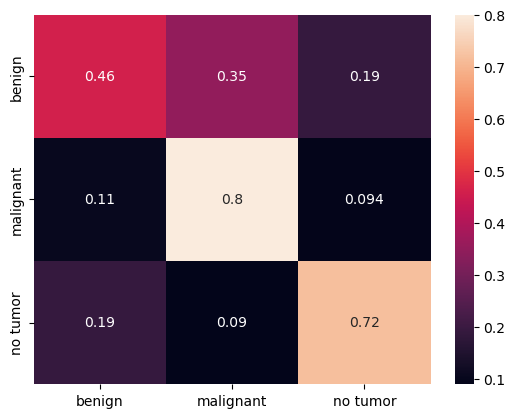

In [19]:
X_std = std.fit_transform(X_rus)

x_train, x_test, y_train, y_test = train_test_split(X_std, Y_rus, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ', X_rus.shape, Y_rus.shape)
print('Training set  ---> ', x_train.shape, y_train.shape)
print('Testing set   ---> ', x_test.shape, y_test.shape, '\n')

logistic_regression(x_train, y_train, labels, 'true')

## Under-sampling: Tomek links
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [20]:
tl = TomekLinks(sampling_strategy='not minority')
X_tl, Y_tl = tl.fit_resample(X, Y)

print(Y_tl.value_counts())

#plot_2d_space(X_tl, Y_tl, 'Tomek links under-sampling')

benign       380
malignant    158
normal       133
Name: label, dtype: int64


Original set  --->  (671, 20) (671,)
Training set  --->  (536, 20) (536,)
Testing set   --->  (135, 20) (135,) 

Test Accuracy Score of Basic Logistics Regression: 65.19
              precision    recall  f1-score   support

      benign       0.65      0.83      0.73        75
   malignant       0.71      0.56      0.63        36
      normal       0.50      0.25      0.33        24

    accuracy                           0.65       135
   macro avg       0.62      0.54      0.56       135
weighted avg       0.64      0.65      0.63       135



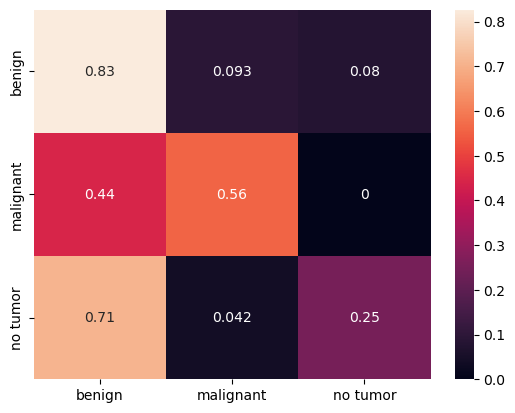

In [21]:
X_std = std.fit_transform(X_tl)

x_train, x_test, y_train, y_test = train_test_split(X_std, Y_tl, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ', X_tl.shape, Y_tl.shape)
print('Training set  ---> ', x_train.shape, y_train.shape)
print('Testing set   ---> ', x_test.shape, y_test.shape, '\n')

logistic_regression(x_train, y_train, labels, 'true')

## Under-sampling: Cluster Centroids
This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In [22]:
cc = ClusterCentroids(sampling_strategy='all', random_state=15)
X_cc, Y_cc = cc.fit_resample(X, Y)

print(Y_cc.value_counts())

#plot_2d_space(X_cc, Y_cc, 'Cluster Centroids under-sampling')

benign       133
malignant    133
normal       133
Name: label, dtype: int64


Original set  --->  (399, 20) (399,)
Training set  --->  (319, 20) (319,)
Testing set   --->  (80, 20) (80,) 

Test Accuracy Score of Basic Logistics Regression: 73.75
              precision    recall  f1-score   support

      benign       0.70      0.62      0.65        26
   malignant       0.71      0.80      0.75        25
      normal       0.79      0.79      0.79        29

    accuracy                           0.74        80
   macro avg       0.73      0.74      0.73        80
weighted avg       0.74      0.74      0.74        80



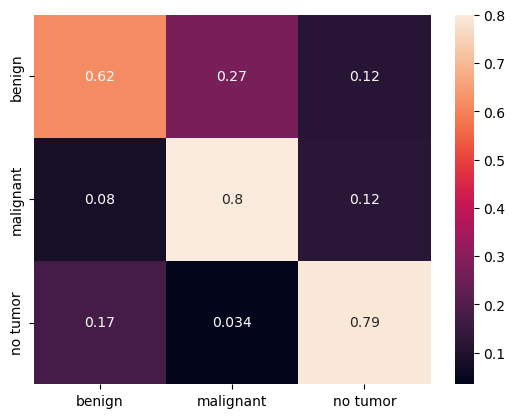

In [23]:
X_std = std.fit_transform(X_cc)

x_train, x_test, y_train, y_test = train_test_split(X_std, Y_cc, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ', X_cc.shape, Y_cc.shape)
print('Training set  ---> ', x_train.shape, y_train.shape)
print('Testing set   ---> ', x_test.shape, y_test.shape, '\n')

logistic_regression(x_train, y_train, labels, 'true')

## Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [24]:
smote = SMOTE(sampling_strategy={'benign': 450, 'malignant': 320, 'normal': 320}, random_state=15)
X_sm, Y_sm = smote.fit_resample(X, Y)

print(Y_sm.value_counts())

# plot_2d_space(X_sm, Y_sm, 'SMOTE over-sampling')

benign       450
normal       320
malignant    320
Name: label, dtype: int64


Original set  --->  (1090, 20) (1090,)
Training set  --->  (872, 20) (872,)
Testing set   --->  (218, 20) (218,) 

Test Accuracy Score of Basic Logistics Regression: 69.27
              precision    recall  f1-score   support

      benign       0.68      0.67      0.67        90
   malignant       0.69      0.71      0.70        63
      normal       0.71      0.71      0.71        65

    accuracy                           0.69       218
   macro avg       0.69      0.70      0.69       218
weighted avg       0.69      0.69      0.69       218



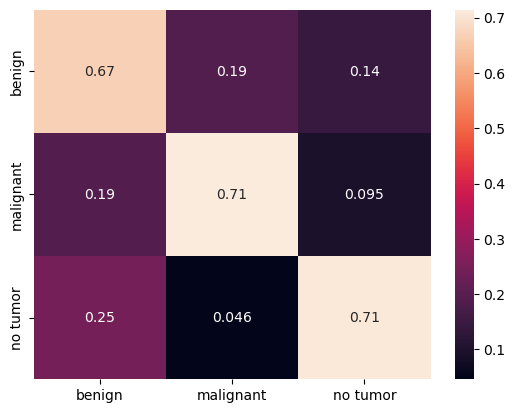

In [25]:
X_std = std.fit_transform(X_sm)

x_train, x_test, y_train, y_test = train_test_split(X_std, Y_sm, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ', X_sm.shape, Y_sm.shape)
print('Training set  ---> ', x_train.shape, y_train.shape)
print('Testing set   ---> ', x_test.shape, y_test.shape, '\n')

logistic_regression(x_train, y_train, labels, 'true')

## Over-sampling followed by under-sampling
Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [26]:
smt = SMOTETomek(sampling_strategy={'benign': 500, 'malignant': 350, 'normal': 350}, random_state=15)
X_smt, Y_smt = smt.fit_resample(X, Y)

print(Y_sm.value_counts())

# plot_2d_space(X_smt, Y_smt, 'SMOTE + Tomek links')

benign       450
normal       320
malignant    320
Name: label, dtype: int64


Original set  --->  (1136, 20) (1136,)
Training set  --->  (908, 20) (908,)
Testing set   --->  (228, 20) (228,) 

Test Accuracy Score of Basic Logistics Regression: 71.49
              precision    recall  f1-score   support

      benign       0.69      0.74      0.71        89
   malignant       0.77      0.71      0.74        70
      normal       0.70      0.68      0.69        69

    accuracy                           0.71       228
   macro avg       0.72      0.71      0.72       228
weighted avg       0.72      0.71      0.72       228



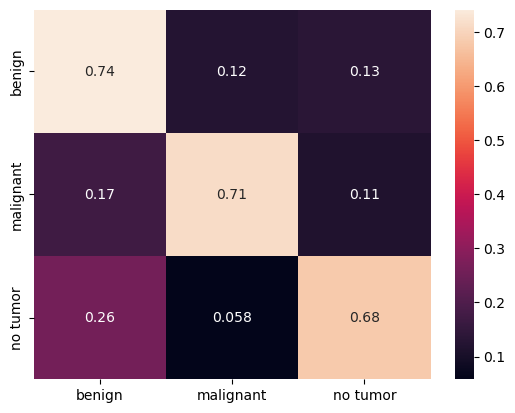

In [27]:
X_std = std.fit_transform(X_smt)

x_train, x_test, y_train, y_test = train_test_split(X_std, Y_smt, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ', X_smt.shape, Y_smt.shape)
print('Training set  ---> ', x_train.shape, y_train.shape)
print('Testing set   ---> ', x_test.shape, y_test.shape, '\n')

logistic_regression(x_train, y_train, labels, 'true')

# Try different Classifier
Now we will try different classifier and tuning hyperparameter

In [36]:
model_lbls = ['dt',
              'lr',
              'svc',
              'knn',
              'rfc']

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': list(range(1,20))}]

tuned_param_nb = [{'var_smoothing': [10**i for i in range(1,-11, -1)]}]

tuned_param_lr = [{'C': list(np.logspace(-4, 4, 50)),
                   'penalty': ['l1', 'l2'],
                   'max_iter': [1000]}]

tuned_param_svc = [{'kernel': ['rbf', 'linear'],
                    'gamma': [1e-3, 1e-4],
                    'C': [10**i for i in range(0,4)]}]

tuned_param_knn =[{'n_neighbors': list(range(1,11)),
                   'metric': ['euclidean', 'manhattan', 'chebyshev']}]

tuned_param_rfc =[{'max_depth': list(range(1,11))}]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'lr': {'name': 'Logistic Regression  ',
           'estimator': LogisticRegression(), 
           'param': tuned_param_lr,
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(), 
           'param': tuned_param_svc
          },
    'knn':{'name': 'K Nearest Neighbor  ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
          },
    'rfc':{'name': 'Random Forest       ',
           'estimator': RandomForestClassifier(),
           'param': tuned_param_rfc
          },
}

scores = ['precision_micro', 'recall_micro', 'f1_micro']



# Tuning hyper-parameters for precision_micro

-------------------------------------------------------------------------------- 

########################################
Trying model Decision Tree       
######################################## 

Best parameters set found on train set:

{'max_depth': 15}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.69      0.66      0.68        89
   malignant       0.73      0.64      0.68        70
      normal       0.70      0.83      0.76        69

    accuracy                           0.71       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.71      0.71      0.70       228



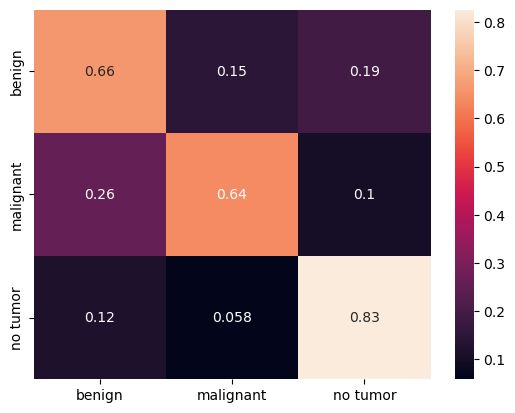


-------------------------------------------------------------------------------- 

########################################
Trying model Logistic Regression  
######################################## 

Best parameters set found on train set:

{'C': 5.428675439323859, 'max_iter': 1000, 'penalty': 'l2'}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.69      0.74      0.71        89
   malignant       0.78      0.74      0.76        70
      normal       0.72      0.68      0.70        69

    accuracy                           0.72       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.73      0.72      0.72       228



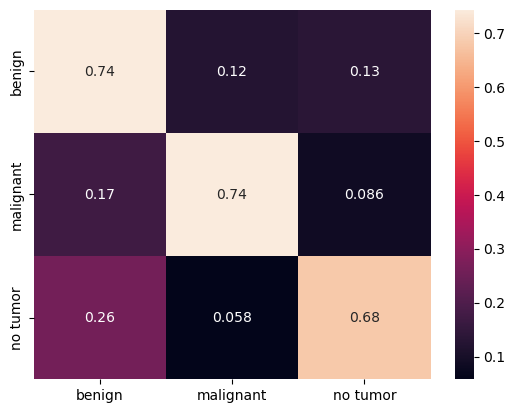


-------------------------------------------------------------------------------- 

########################################
Trying model Support Vector      
######################################## 

Best parameters set found on train set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.69      0.75      0.72        89
   malignant       0.87      0.69      0.77        70
      normal       0.72      0.80      0.76        69

    accuracy                           0.75       228
   macro avg       0.76      0.75      0.75       228
weighted avg       0.76      0.75      0.75       228



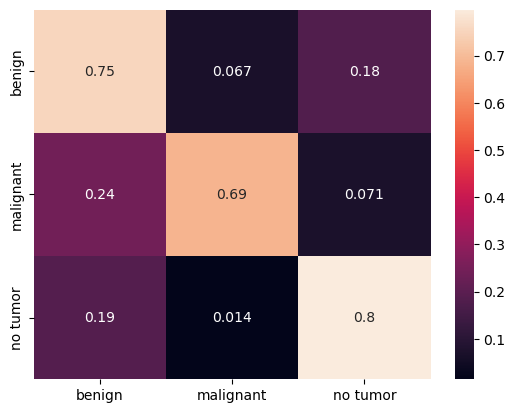


-------------------------------------------------------------------------------- 

########################################
Trying model K Nearest Neighbor  
######################################## 

Best parameters set found on train set:

{'metric': 'chebyshev', 'n_neighbors': 1}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.78      0.71      0.74        89
   malignant       0.77      0.71      0.74        70
      normal       0.77      0.91      0.83        69

    accuracy                           0.77       228
   macro avg       0.77      0.78      0.77       228
weighted avg       0.77      0.77      0.77       228



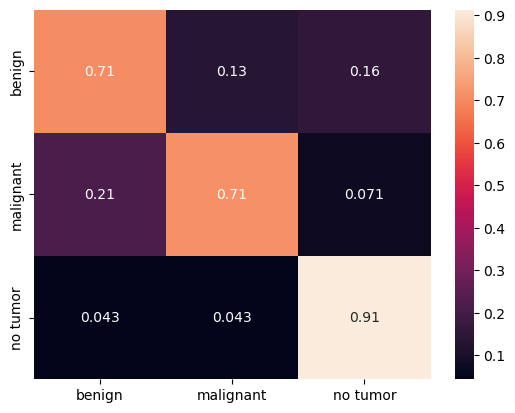


-------------------------------------------------------------------------------- 

########################################
Trying model Random Forest       
######################################## 

Best parameters set found on train set:

{'max_depth': 10}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.72      0.82      0.77        89
   malignant       0.85      0.64      0.73        70
      normal       0.84      0.90      0.87        69

    accuracy                           0.79       228
   macro avg       0.80      0.79      0.79       228
weighted avg       0.80      0.79      0.79       228



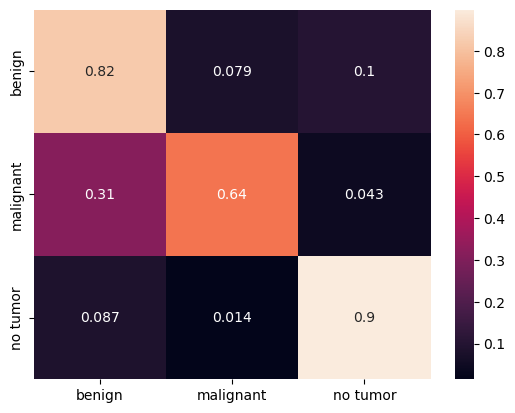


Summary of results for precision_micro
Estimator
Decision Tree       	 - score: 68.83%
Logistic Regression  	 - score: 67.51%
Support Vector      	 - score: 72.14%
K Nearest Neighbor  	 - score: 79.19%
Random Forest       	 - score: 77.42%


# Tuning hyper-parameters for recall_micro

-------------------------------------------------------------------------------- 

########################################
Trying model Decision Tree       
######################################## 

Best parameters set found on train set:

{'max_depth': 18}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.66      0.69      0.67        89
   malignant       0.74      0.61      0.67        70
      normal       0.74      0.84      0.79        69

    accuracy                           0.71       228
   macro avg       0.72      

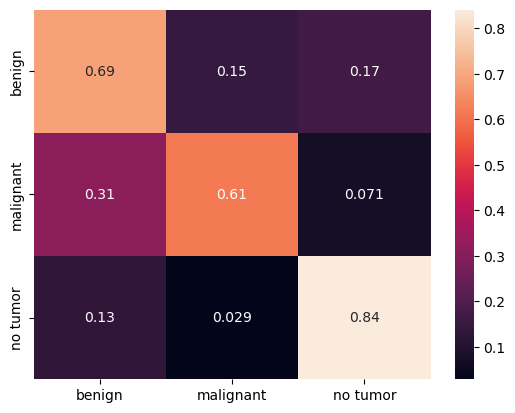


-------------------------------------------------------------------------------- 

########################################
Trying model Logistic Regression  
######################################## 

Best parameters set found on train set:

{'C': 5.428675439323859, 'max_iter': 1000, 'penalty': 'l2'}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.69      0.74      0.71        89
   malignant       0.78      0.74      0.76        70
      normal       0.72      0.68      0.70        69

    accuracy                           0.72       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.73      0.72      0.72       228



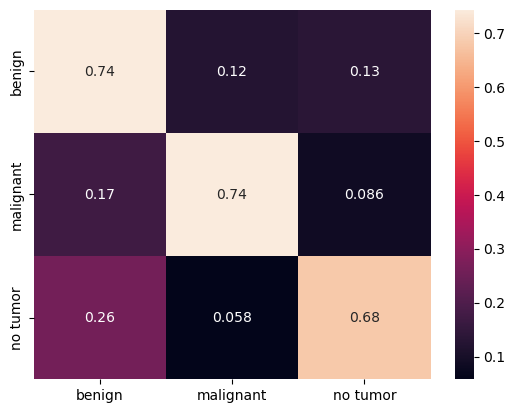


-------------------------------------------------------------------------------- 

########################################
Trying model Support Vector      
######################################## 

Best parameters set found on train set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.69      0.75      0.72        89
   malignant       0.87      0.69      0.77        70
      normal       0.72      0.80      0.76        69

    accuracy                           0.75       228
   macro avg       0.76      0.75      0.75       228
weighted avg       0.76      0.75      0.75       228



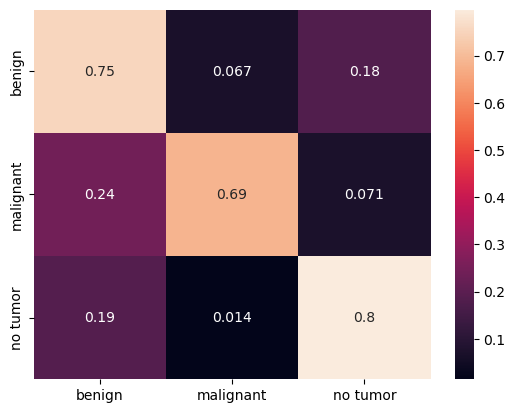


-------------------------------------------------------------------------------- 

########################################
Trying model K Nearest Neighbor  
######################################## 

Best parameters set found on train set:

{'metric': 'chebyshev', 'n_neighbors': 1}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.78      0.71      0.74        89
   malignant       0.77      0.71      0.74        70
      normal       0.77      0.91      0.83        69

    accuracy                           0.77       228
   macro avg       0.77      0.78      0.77       228
weighted avg       0.77      0.77      0.77       228



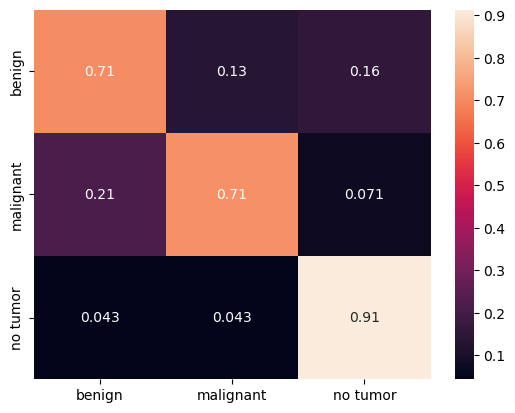


-------------------------------------------------------------------------------- 

########################################
Trying model Random Forest       
######################################## 

Best parameters set found on train set:

{'max_depth': 10}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.70      0.78      0.74        89
   malignant       0.85      0.64      0.73        70
      normal       0.79      0.88      0.84        69

    accuracy                           0.77       228
   macro avg       0.78      0.77      0.77       228
weighted avg       0.78      0.77      0.77       228



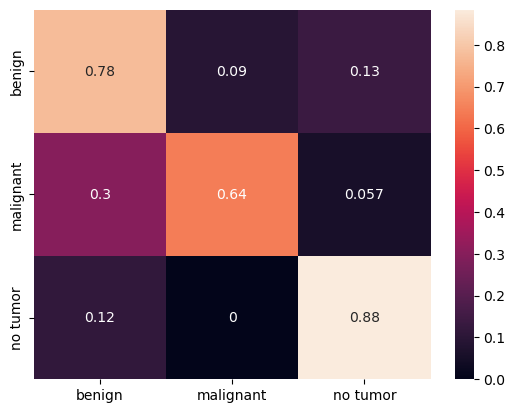


Summary of results for recall_micro
Estimator
Decision Tree       	 - score: 67.51%
Logistic Regression  	 - score: 67.51%
Support Vector      	 - score: 72.14%
K Nearest Neighbor  	 - score: 79.19%
Random Forest       	 - score: 78.09%


# Tuning hyper-parameters for f1_micro

-------------------------------------------------------------------------------- 

########################################
Trying model Decision Tree       
######################################## 

Best parameters set found on train set:

{'max_depth': 16}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.65      0.62      0.63        89
   malignant       0.70      0.63      0.66        70
      normal       0.72      0.84      0.78        69

    accuracy                           0.69       228
   macro avg       0.69      0.70   

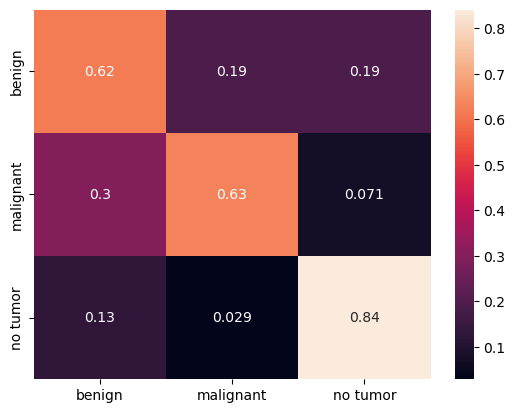


-------------------------------------------------------------------------------- 

########################################
Trying model Logistic Regression  
######################################## 

Best parameters set found on train set:

{'C': 5.428675439323859, 'max_iter': 1000, 'penalty': 'l2'}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.69      0.74      0.71        89
   malignant       0.78      0.74      0.76        70
      normal       0.72      0.68      0.70        69

    accuracy                           0.72       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.73      0.72      0.72       228



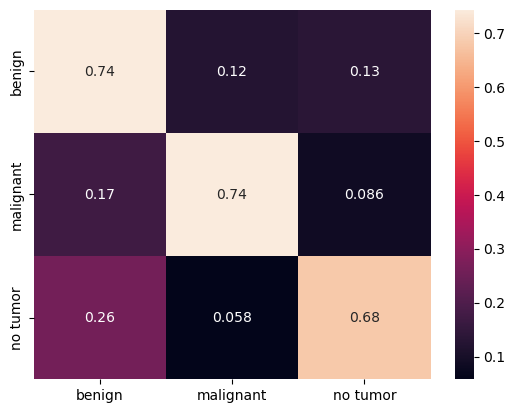


-------------------------------------------------------------------------------- 

########################################
Trying model Support Vector      
######################################## 

Best parameters set found on train set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.69      0.75      0.72        89
   malignant       0.87      0.69      0.77        70
      normal       0.72      0.80      0.76        69

    accuracy                           0.75       228
   macro avg       0.76      0.75      0.75       228
weighted avg       0.76      0.75      0.75       228



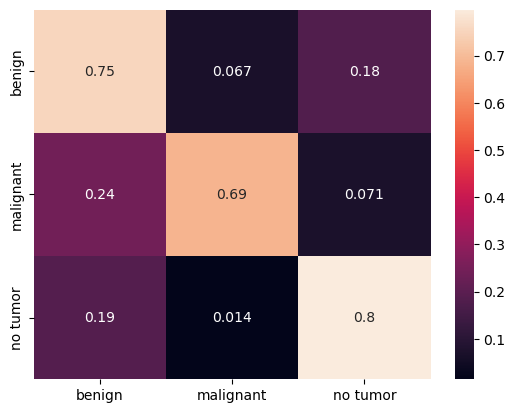


-------------------------------------------------------------------------------- 

########################################
Trying model K Nearest Neighbor  
######################################## 

Best parameters set found on train set:

{'metric': 'chebyshev', 'n_neighbors': 1}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.78      0.71      0.74        89
   malignant       0.77      0.71      0.74        70
      normal       0.77      0.91      0.83        69

    accuracy                           0.77       228
   macro avg       0.77      0.78      0.77       228
weighted avg       0.77      0.77      0.77       228



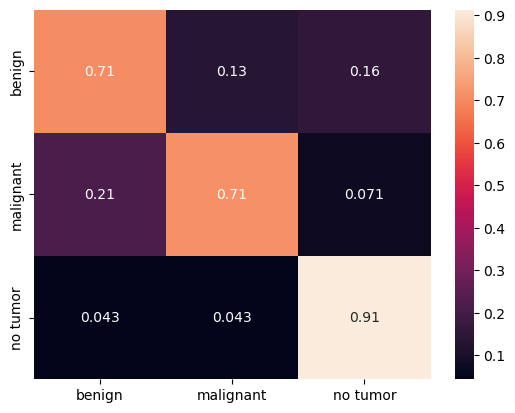


-------------------------------------------------------------------------------- 

########################################
Trying model Random Forest       
######################################## 

Best parameters set found on train set:

{'max_depth': 10}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

      benign       0.74      0.83      0.78        89
   malignant       0.88      0.64      0.74        70
      normal       0.79      0.88      0.84        69

    accuracy                           0.79       228
   macro avg       0.80      0.79      0.79       228
weighted avg       0.80      0.79      0.79       228



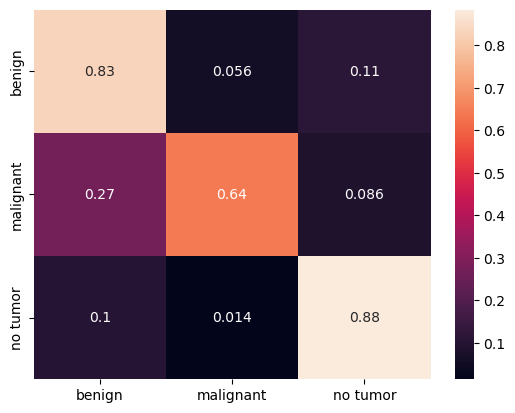


Summary of results for f1_micro
Estimator
Decision Tree       	 - score: 68.61%
Logistic Regression  	 - score: 67.51%
Support Vector      	 - score: 72.14%
K Nearest Neighbor  	 - score: 79.19%
Random Forest       	 - score: 78.75%


In [39]:
def print_results(model, x_test, y_test):
    print("Best parameters set found on train set:")
    print()
    print(model.best_params_)
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    
    y_pred = model.predict(x_test)

    conf1 = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(conf1, annot=True, xticklabels=labels, yticklabels=labels)
    print(classification_report(y_test,y_pred))
    plt.show()
    print()


results_short = {}

for score in scores:
    print('\n', '='*120, '\n')
    print("# Tuning hyper-parameters for %s" % score)
    print()

    #'%s_macro' % score ## is a string formatting expression
    # the parameter after % is substituted in the string placeholder %s
    for m in model_lbls:
        print('-'*80, '\n')
        print('#'*40)
        print("Trying model {}".format(models[m]['name']))
        print('#'*40, '\n')
        clf = GridSearchCV(models[m]['estimator'],
                           models[m]['param'],
                           cv=5,
                           scoring=score,
                           return_train_score = False,
                           n_jobs = 4, # this allows using multi-cores
                           )
        clf.fit(x_train, y_train)
        print_results(clf, x_test, y_test)
        results_short[m] = clf.best_score_
    print("Summary of results for {}".format(score))
    print("Estimator")
    for m in results_short.keys():
        print("{}\t - score: {:5.2f}%".format(models[m]['name'], results_short[m]*100))